In [14]:
"""Build a sentiment analysis / polarity model

Sentiment analysis can be casted as a binary text classification problem,
that is fitting a linear classifier on features extracted from the text
of the user messages so as to guess wether the opinion of the author is
positive or negative.

In this examples we will use a movie review dataset.

"""
# Author: Olivier Grisel <olivier.grisel@ensta.org>
# License: Simplified BSD

import sys
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.datasets import load_files
from sklearn.cross_validation import train_test_split
from sklearn import metrics

In [4]:
import os
data_path = os.getenv('DATA_PATH')

In [6]:
# the training data folder must be passed as first argument
movie_reviews_data_folder = os.path.join(data_path, 'sklearn_text_analytics', 'txt_sentoken')
dataset = load_files(movie_reviews_data_folder, shuffle=False)
print("n_samples: %d" % len(dataset.data))

# split the dataset in training and test set:
docs_train, docs_test, y_train, y_test = train_test_split(
    dataset.data, dataset.target, test_size=0.25, random_state=None)

n_samples: 2000


In [19]:
pipeline = Pipeline([('vectorizer', TfidfVectorizer()), ('svc', SGDClassifier())])
parameters = {'vectorizer__analyzer': ['word', 'char']
              ,'vectorizer__ngram_range': [(1,1), (1,2), (2,2)]
              ,'vectorizer__max_df': [0.80, 1.00]
              ,'vectorizer__min_df': [0.00, 0.20]}

In [20]:
# TASK: Build a vectorizer / classifier pipeline that filters out tokens
# that are too rare or too frequent
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
grid_search.fit(docs_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('vectorizer', TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm=u'l2', preprocessor=None, smooth_id...   penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False))]),
       fit_params={}, iid=True, loss_func=None, n_jobs=-1,
       param_grid={'vectorizer__min_df': [0.0, 0.2], 'vectorizer__ngram_range': [(1, 1), (1, 2), (2, 2)], 'vectorizer__analyzer': ['word', 'char'], 'vectorizer__max_df': [0.8, 1.0]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [21]:
# TASK: print the cross-validated scores for the each parameters set
# explored by the grid search
grid_search.grid_scores_

[mean: 0.83267, std: 0.00589, params: {'vectorizer__min_df': 0.0, 'vectorizer__ngram_range': (1, 1), 'vectorizer__analyzer': 'word', 'vectorizer__max_df': 0.8},
 mean: 0.85200, std: 0.00924, params: {'vectorizer__min_df': 0.0, 'vectorizer__ngram_range': (1, 2), 'vectorizer__analyzer': 'word', 'vectorizer__max_df': 0.8},
 mean: 0.81933, std: 0.00793, params: {'vectorizer__min_df': 0.0, 'vectorizer__ngram_range': (2, 2), 'vectorizer__analyzer': 'word', 'vectorizer__max_df': 0.8},
 mean: 0.70533, std: 0.03286, params: {'vectorizer__min_df': 0.2, 'vectorizer__ngram_range': (1, 1), 'vectorizer__analyzer': 'word', 'vectorizer__max_df': 0.8},
 mean: 0.73400, std: 0.02121, params: {'vectorizer__min_df': 0.2, 'vectorizer__ngram_range': (1, 2), 'vectorizer__analyzer': 'word', 'vectorizer__max_df': 0.8},
 mean: 0.59267, std: 0.02310, params: {'vectorizer__min_df': 0.2, 'vectorizer__ngram_range': (2, 2), 'vectorizer__analyzer': 'word', 'vectorizer__max_df': 0.8},
 mean: 0.83467, std: 0.00550, para

In [23]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'vectorizer__min_df': 0.0, 'vectorizer__ngram_range': (1, 2), 'vectorizer__analyzer': 'word', 'vectorizer__max_df': 0.8}
0.852


In [24]:
# TASK: Predict the outcome on the testing set and store it in a variable
# named y_predicted
y_predicted = grid_search.best_estimator_.predict(docs_test)

             precision    recall  f1-score   support

        neg       0.88      0.83      0.86       252
        pos       0.84      0.89      0.86       248

avg / total       0.86      0.86      0.86       500

[[210  42]
 [ 28 220]]


<matplotlib.colorbar.Colorbar instance at 0x7fc390694368>

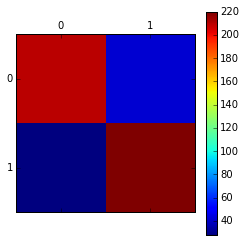

In [27]:
# Print the classification report
print(metrics.classification_report(y_test, y_predicted,
                                    target_names=dataset.target_names))

# Print and plot the confusion matrix
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)

plt.matshow(cm)
plt.colorbar()